<a href="https://colab.research.google.com/github/hshastri/PyTorchBasics/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# https://setosa.io/ev/image-kernels/ -> good for learning

In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
# convert MNIST image files into tensor of 4 dimensions (num of images, height, width, color channel)
transform = transforms.ToTensor()

In [67]:
# Train data
train_data = datasets.MNIST(root='/ccn_data', train=True, download=True, transform=transform)

In [68]:
# test data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [69]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /ccn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [70]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [71]:
pwd

'/content'

In [72]:
ls

sample_data/


In [73]:
 cd ../

/


In [74]:
ls

bin@                        etc/     mnt/                      sbin@
boot/                       home/    NGC-DL-CONTAINER-LICENSE  srv/
ccn_data/                   kaggle/  opt/                      sys/
cnn_data/                   lib@     proc/                     tmp/
content/                    lib32@   python-apt/               tools/
cuda-keyring_1.1-1_all.deb  lib64@   python-apt.tar.xz*        usr/
datalab/                    libx32@  root/                     var/
dev/                        media/   run/


In [75]:
cd cnn_data

/cnn_data


In [76]:
ls

MNIST/


In [77]:
cd ../

/


In [78]:
ls

bin@                        etc/     mnt/                      sbin@
boot/                       home/    NGC-DL-CONTAINER-LICENSE  srv/
ccn_data/                   kaggle/  opt/                      sys/
cnn_data/                   lib@     proc/                     tmp/
content/                    lib32@   python-apt/               tools/
cuda-keyring_1.1-1_all.deb  lib64@   python-apt.tar.xz*        usr/
datalab/                    libx32@  root/                     var/
dev/                        media/   run/


In [79]:
cd content

/content


In [80]:
 # create a small batch size of images --- 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [81]:
# define our cnn model
# describe convolutional layer and what it's doing (2 convolutional layers)
conv1 = nn.Conv2d(1, 6, 3, 1)
"""
Input channels (1):
This layer expects input with 1 channel, which usually means grayscale images like MNIST.

Output channels (6):
The layer applies 6 different filters, producing 6 output feature maps. Each filter learns to detect a different feature (like horizontal edges, vertical lines, corners, etc.).

Kernel size (3):
Each of the 6 filters is a 3×3 window. This small patch slides across the input image, scanning for patterns.

Stride (1):
This means the filter moves 1 pixel at a time, so the scanning is fine-grained.
"""
conv2 = nn.Conv2d(6, 16, 3, 1)

In [82]:
# grab 1 MNIST record/image
for i, (X_Train, y_Train) in enumerate(train_data):
  break

In [83]:
X_Train # 1 image -> 28 rows, 28 cols

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

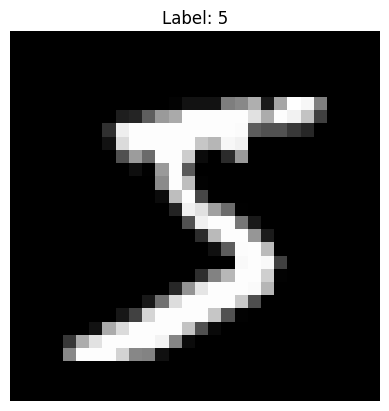

In [84]:
plt.imshow(X_Train.squeeze(), cmap='gray')
plt.title(f"Label: {y_Train}")
plt.axis('off')
plt.show()

In [85]:
x = X_Train.view(1,1,28,28)

In [86]:
x

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [87]:
# perform convolution
x = F.relu(conv1(x)) # rectified linear unit for activation function

In [88]:
x

tensor([[[[0.2683, 0.2683, 0.2683,  ..., 0.2683, 0.2683, 0.2683],
          [0.2683, 0.2683, 0.2683,  ..., 0.2683, 0.2683, 0.2683],
          [0.2683, 0.2683, 0.2683,  ..., 0.2683, 0.2683, 0.2683],
          ...,
          [0.2683, 0.2683, 0.0482,  ..., 0.2683, 0.2683, 0.2683],
          [0.2683, 0.2683, 0.1320,  ..., 0.2683, 0.2683, 0.2683],
          [0.2683, 0.2683, 0.2683,  ..., 0.2683, 0.2683, 0.2683]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [89]:
x.shape # 1 -> image, 6 -> filters (kernels),
# dimensions -> 26 x 26 -we set up padding (no info in first 2 pizels) so the original data was 28 x 28

torch.Size([1, 6, 26, 26])

In [90]:
# pass through the pooling layer
x = F.max_pool2d(x, 2, 2) # kernel of 2 and stride of 2

In [91]:
x.shape # 13 x 13 is the result of pooling because we have two strides.

torch.Size([1, 6, 13, 13])

In [92]:
x

tensor([[[[0.2683, 0.2683, 0.2683,  ..., 0.2683, 0.2683, 0.2683],
          [0.2683, 0.2683, 0.2683,  ..., 0.2683, 0.2683, 0.2683],
          [0.2683, 0.2683, 0.2690,  ..., 0.0000, 0.2960, 0.2683],
          ...,
          [0.2683, 0.2691, 0.2685,  ..., 0.2683, 0.2683, 0.2683],
          [0.2683, 0.2036, 0.0000,  ..., 0.2683, 0.2683, 0.2683],
          [0.2683, 0.2683, 0.2683,  ..., 0.2683, 0.2683, 0.2683]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [93]:
x = F.relu(conv2(x))

In [94]:
x

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0038, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.1081, 0.0578, 0.0582],
          [0.0000, 0.0000, 0.0000,  ..., 0.2269, 0.0327, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.1046, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.1377,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.1232, 0.2546,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.1208, 0.1402, 0.1622,  ..., 0.1392, 0.0732, 0.1364],
          [0.1259, 0.1059, 0.0363,  ..., 0.2227, 0.2310, 0.2169],
          [0.1165, 0.0557, 0.1330,  ..., 0.4794, 0.3038, 0.2601],
          ...,
          [0.1521, 0.1513, 0.1340,  ..., 0.3448, 0.1789, 0.1169],
          [0.0754, 0.0560, 0.0717,  ..., 0.2557, 0.1002, 0.1206],
          [0.0799, 0.1418, 0.3075,  ..., 0.1089, 0.1160, 0.1207]],

         [[0.0006, 0.0355, 0.1034,  ..., 0.1800, 0.1579, 0.1450],
          [0.0088, 0.0201, 0.1047,  ..., 0.1565, 0.1369, 0.0874],
          [0.0000, 0.0000, 0.0045,  ..., 0

In [95]:
x.shape

torch.Size([1, 16, 11, 11])

In [96]:
x = F.max_pool2d(x,2,2)

In [97]:
x

tensor([[[[0.0000, 0.0072, 0.0772, 0.0898, 0.1081],
          [0.0000, 0.2571, 0.3302, 0.2893, 0.2269],
          [0.0000, 0.0000, 0.2743, 0.1804, 0.0000],
          [0.0000, 0.0000, 0.0694, 0.2534, 0.2084],
          [0.0000, 0.1985, 0.2958, 0.2388, 0.1046]],

         [[0.1402, 0.1795, 0.2008, 0.1783, 0.2310],
          [0.1526, 0.2902, 0.3731, 0.4439, 0.4794],
          [0.1760, 0.1959, 0.2396, 0.1931, 0.1618],
          [0.1216, 0.1904, 0.2192, 0.2933, 0.3043],
          [0.1521, 0.2695, 0.5482, 0.4710, 0.3448]],

         [[0.0355, 0.2176, 0.2799, 0.2500, 0.1800],
          [0.0000, 0.1542, 0.1371, 0.0626, 0.0585],
          [0.0006, 0.0000, 0.1717, 0.2311, 0.0806],
          [0.0020, 0.1222, 0.1329, 0.2844, 0.2616],
          [0.1930, 0.2646, 0.2681, 0.1020, 0.0744]],

         [[0.1424, 0.1619, 0.1842, 0.2504, 0.2239],
          [0.1946, 0.3095, 0.3356, 0.3319, 0.3317],
          [0.1526, 0.2624, 0.2916, 0.1736, 0.1633],
          [0.1424, 0.1573, 0.2676, 0.2738, 0.2690],
      

In [98]:
x.shape

torch.Size([1, 16, 5, 5])